In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
import itertools
from mlxtend.plotting import plot_decision_regions
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.metrics import explained_variance_score
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, accuracy_score, plot_confusion_matrix, confusion_matrix

In [5]:
#Importing our dataset as a dataframe from the Comma-separated values (CSV) file.
dataset = pd.read_csv('Coupons_data.csv')

In [10]:
#Representing the first few values of our dataframe
dataset.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [11]:
#Storing our target (Y) in a variable called y_true
y_true = dataset['Y'].values
y_true

array([1, 0, 1, ..., 0, 0, 0])

In [12]:
#Showcasing the dataset's information.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [13]:
dataset.isnull().sum()
#As it is clear, 'car' is mostly empty. As such, we will drop it, so will the surveyes with missing values.

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [14]:
dataset.drop(['car'], axis=1, inplace=True)
dataset.isnull().sum()

destination               0
passanger                 0
weather                   0
temperature               0
time                      0
coupon                    0
expiration                0
gender                    0
age                       0
maritalStatus             0
has_children              0
education                 0
occupation                0
income                    0
Bar                     107
CoffeeHouse             217
CarryAway               151
RestaurantLessThan20    130
Restaurant20To50        189
toCoupon_GEQ5min          0
toCoupon_GEQ15min         0
toCoupon_GEQ25min         0
direction_same            0
direction_opp             0
Y                         0
dtype: int64

In [15]:
dataset.dropna(inplace=True)
dataset.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12079 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12079 non-null  object
 1   passanger             12079 non-null  object
 2   weather               12079 non-null  object
 3   temperature           12079 non-null  int64 
 4   time                  12079 non-null  object
 5   coupon                12079 non-null  object
 6   expiration            12079 non-null  object
 7   gender                12079 non-null  object
 8   age                   12079 non-null  object
 9   maritalStatus         12079 non-null  object
 10  has_children          12079 non-null  int64 
 11  education             12079 non-null  object
 12  occupation            12079 non-null  object
 13  income                12079 non-null  object
 14  Bar                   12079 non-null  object
 15  CoffeeHouse           12079 non-nul

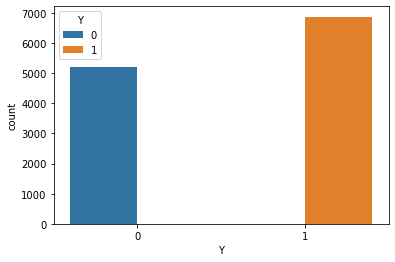

In [17]:
#Plotting our target
sns.countplot(x='Y',  hue='Y', data=dataset)
plt.show()

In [12]:
#sns.pairplot(dataset, hue='Y')
#As the pairplot and warnings show, the data cannot be properly visualized because it contains
#non-numerical (strings and objects) values.

In [26]:
X = dataset[['expiration', 'gender']]
model_1 = KNeighborsClassifier() 
model_1.fit(X, y_true)
X.values.shape
#Again, the same problem appears; values must be numbers (integers, floats, etc.)

ValueError: could not convert string to float: '1d'

In [18]:
#We make a new dataframe copy to replace the non-numerical values with numbers
dataset_preprocessed = dataset.copy();
dataset_preprocessed["destination"].replace({"No Urgent Place": 0, "Home": 1, "Work": 2}, inplace=True)
dataset_preprocessed["passanger"].replace({"Alone": 0, "Friend(s)": 1, "Kid(s)": 2, "Partner": 3}, inplace=True)
dataset_preprocessed["weather"].replace({"Sunny": 0, "Rainy": 1, "Snowy": 2}, inplace=True)
dataset_preprocessed["time"].replace({"7AM": 0, "10AM": 1, "2PM": 2, "6PM": 3, "10PM": 4}, inplace=True)
dataset_preprocessed["coupon"].replace({"Restaurant(<20)": 0, "Restaurant(20-50)": 1, "Coffee House": 2, "Bar": 3,
                                        "Carry out & Take away": 4} ,inplace=True)
dataset_preprocessed["expiration"].replace({"2h": 0, "1d": 1}, inplace=True)
dataset_preprocessed["gender"].replace({"Female": 0, "Male": 1}, inplace=True)
dataset_preprocessed["age"].replace({"below21": 0, "21": 1, "26": 2, "31": 3, "36": 4, "41": 5, "46": 6, "50plus": 7},
                                    inplace=True)
dataset_preprocessed["maritalStatus"].replace({"Unmarried partner": 0, "Single": 1, "Married partner": 2, "Divorced": 3,
                                               "Widowed": 4}, inplace=True)
dataset_preprocessed["education"].replace({"Some college - no degree": 0, "Bachelors degree": 1, "Associates degree": 2, "High School Graduate": 3,
                                           "Graduate degree (Masters or Doctorate)": 4, "Some High School": 5}, inplace=True)
dataset_preprocessed["occupation"].replace({"Unemployed": 0, "Architecture & Engineering": 1, "Student": 2,
                                            "Education&Training&Library": 3, "Healthcare Support": 4 , "Healthcare Practitioners & Technical": 5,
                                           "Sales & Related": 6, "Management": 7, "Arts Design Entertainment Sports & Media": 8, "Computer & Mathematical": 9,
                                           "Life Physical Social Science": 10, "Personal Care & Service": 11,
                                            "Community & Social Services": 12, "Office & Administrative Support": 13, "Construction & Extraction": 14,
                                           "Legal": 15, "Retired": 16, "Installation Maintenance & Repair": 17,
                                            "Transportation & Material Moving": 18, "Business & Financial": 19, "Protective Service": 20,
                                            "Food Preparation & Serving Related": 21, "Production Occupations": 22,
                                           "Building & Grounds Cleaning & Maintenance": 23, "Farming Fishing & Forestry": 24}, inplace=True)
dataset_preprocessed["income"].replace({"Less than $12500":0, "$12500 - $24999": 1, "$25000 - $37499": 2, "$37500 - $49999": 3,
                                        "$50000 - $62499": 4, "$62500 - $74999": 5, "$75000 - $87499": 6, "$87500 - $99999": 7,
                                        "$100000 or More": 8}, inplace=True)
dataset_preprocessed["Bar"].replace({"never": 0, "less1": 1, "1~3": 2, "4~8": 3, "gt8": 4}, inplace=True)
dataset_preprocessed["CoffeeHouse"].replace({"never": 0, "less1": 1, "1~3": 2, "4~8": 3, "gt8": 4}, inplace=True)
dataset_preprocessed["CarryAway"].replace({"never": 0, "less1": 1, "1~3": 2, "4~8": 3, "gt8": 4}, inplace=True)
dataset_preprocessed["RestaurantLessThan20"].replace({"never": 0, "less1": 1, "1~3": 2, "4~8": 3, "gt8": 4}, inplace=True)
dataset_preprocessed["Restaurant20To50"].replace({"never": 0, "less1": 1, "1~3": 2, "4~8": 3, "gt8": 4}, inplace=True)
#le = preprocessing.LabelEncoder()
#le.fit(["Female", "Male"])

In [19]:
dataset_preprocessed.head()
dataset_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12079 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   destination           12079 non-null  int64
 1   passanger             12079 non-null  int64
 2   weather               12079 non-null  int64
 3   temperature           12079 non-null  int64
 4   time                  12079 non-null  int64
 5   coupon                12079 non-null  int64
 6   expiration            12079 non-null  int64
 7   gender                12079 non-null  int64
 8   age                   12079 non-null  int64
 9   maritalStatus         12079 non-null  int64
 10  has_children          12079 non-null  int64
 11  education             12079 non-null  int64
 12  occupation            12079 non-null  int64
 13  income                12079 non-null  int64
 14  Bar                   12079 non-null  int64
 15  CoffeeHouse           12079 non-null  int64
 16  Car

In [20]:
dataset_preprocessed.to_csv("dataset_preprocessed.csv")

In [21]:
#sns.pairplot(dataset_preprocessed, hue='Y')

In [14]:
y_true = dataset_preprocessed['Y'].values
y_true

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [ ]:
#We implemented simple data exploration methods and models to learn more about our dataset and what to expect.
#We tried models with different hyperparameters like n_neighbors, weight, normalization, etc.

In [39]:
X = dataset_preprocessed[['destination','passanger', 'weather', 'temperature', 'time', 'coupon', 'expiration', 'gender', 'age', 'maritalStatus',  'education', 'occupation','income','direction_same','direction_opp']]

model_1 = KNeighborsClassifier() 
# KNeighborsClassifier(n_neighbors=5, weights='distance') 

## Fit (i.e. traing) the model
model_1.fit(X, y_true)

KNeighborsClassifier()

In [40]:
feature_names = ['destination','passanger', 'weather', 'temperature', 'time', 'coupon', 'expiration', 'gender', 'age', 'maritalStatus',  'education', 'occupation','income','Bar','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50','toCoupon_GEQ15min','toCoupon_GEQ25min','direction_same' ,'direction_opp']



In [41]:
#plot_decision_regions(X.values, y_true.astype(np.int_), model_1)

[[5623 1254]
 [1538 3664]]


<AxesSubplot:>

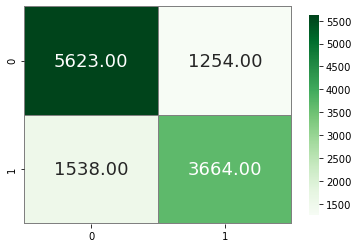

In [42]:
y_hat = model_1.predict(X)
labels = dataset_preprocessed["Y"].unique()

matrix = confusion_matrix(y_true, y_hat, labels=labels, normalize=None)
#matrix = confusion_matrix(y_true, y_hat, labels=labels, normalize='true')
print(matrix)

sns.heatmap(matrix, annot=True,  
                  annot_kws={"size": 18},
                  fmt='.2f', cmap="Greens", cbar_kws={"shrink": .92},
                  linewidths=0.1, linecolor='gray')

In [43]:
print(classification_report(y_true, y_hat))

              precision    recall  f1-score   support

           0       0.75      0.70      0.72      5202
           1       0.79      0.82      0.80      6877

    accuracy                           0.77     12079
   macro avg       0.77      0.76      0.76     12079
weighted avg       0.77      0.77      0.77     12079



[[6700  177]
 [   0 5202]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      5202
           1       1.00      0.97      0.99      6877

    accuracy                           0.99     12079
   macro avg       0.98      0.99      0.99     12079
weighted avg       0.99      0.99      0.99     12079



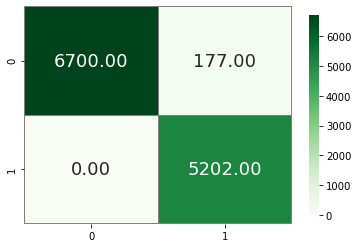

In [44]:
X2 = dataset_preprocessed[['destination','passanger', 'weather', 'temperature', 'time', 'coupon', 'expiration', 'gender', 'age', 'maritalStatus',  'education', 'occupation','income','direction_same','direction_opp']]
model_2 = KNeighborsClassifier(n_neighbors=5, weights='distance') 

model_2.fit(X2, y_true)

y_hat = model_2.predict(X2)
labels = dataset_preprocessed["Y"].unique()

matrix2 = confusion_matrix(y_true, y_hat, labels=labels, normalize=None)
print(matrix2)

sns.heatmap(matrix2, annot=True,  
                  annot_kws={"size": 18},
                  fmt='.2f', cmap="Greens", cbar_kws={"shrink": .92},
                  linewidths=0.1, linecolor='gray')
print(classification_report(y_true, y_hat))

[[1686  758]
 [ 770 1014]]


<AxesSubplot:>

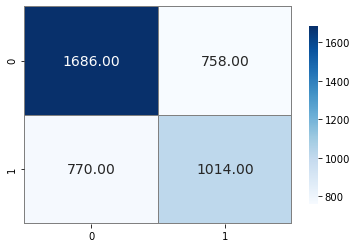

In [45]:
X = dataset_preprocessed[['destination','passanger', 'weather', 'temperature', 'time', 'coupon', 'expiration', 'gender', 'age', 'maritalStatus',  'education', 'occupation','income','direction_same','direction_opp']]
y = dataset_preprocessed["Y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42, shuffle=True)

model_4 = KNeighborsClassifier(n_neighbors=5, weights='distance') 
## Try using uniform weights and check the results
model_4.fit(X_train, y_train)
y_hat = model_4.predict(X_test)

matrix = confusion_matrix(y_test, y_hat, labels=y.unique(), normalize=None)
print(matrix)

sns.heatmap(matrix, annot=True,  
                  annot_kws={"size": 14},
                  fmt='.2f', cmap="Blues", cbar_kws={"shrink": .82},
                  linewidths=0.1, linecolor='gray')

In [46]:
print(classification_report(y_hat, y_test))

              precision    recall  f1-score   support

           0       0.57      0.57      0.57      1772
           1       0.69      0.69      0.69      2456

    accuracy                           0.64      4228
   macro avg       0.63      0.63      0.63      4228
weighted avg       0.64      0.64      0.64      4228



[[5664 1213]
 [1563 3639]]
              precision    recall  f1-score   support

           0       0.75      0.70      0.72      5202
           1       0.78      0.82      0.80      6877

    accuracy                           0.77     12079
   macro avg       0.77      0.76      0.76     12079
weighted avg       0.77      0.77      0.77     12079



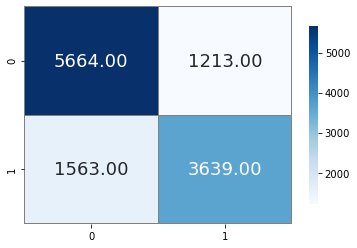

In [47]:
X3 = dataset_preprocessed.drop(['Y'], axis=1)
model_3 = KNeighborsClassifier()
model_3.fit(X3, y_true)
y_hat = model_3.predict(X3)

matrix3 = confusion_matrix(y_true, y_hat, labels=labels, normalize=None)
print(matrix3)

sns.heatmap(matrix3, annot=True,  
                  annot_kws={"size": 18},
                  fmt='.2f', cmap="Blues", cbar_kws={"shrink": .82},
                  linewidths=0.1, linecolor='gray')
print(classification_report(y_true, y_hat))

In [ ]:
error_rate = []
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X3)
    error_rate.append(np.mean(pred_i != y_test))
    # error_rate.append -> adds error rate of model with various k-value, using the average where prediction not
# equal to the test values
#error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(15,6))
plt.plot(error_rate,color='blue',linestyle='dashed',marker='o', markerfacecolor='red', markersize='10')
plt.xlabel('no. of K')
plt.ylabel('Error Rate')
optimal_k = error_rate.index(min(error_rate))
print("Optimal K: ", optimal_k)

[[1155  629]
 [ 976 1468]]
              precision    recall  f1-score   support

           0       0.54      0.65      0.59      1784
           1       0.70      0.60      0.65      2444

    accuracy                           0.62      4228
   macro avg       0.62      0.62      0.62      4228
weighted avg       0.63      0.62      0.62      4228



<AxesSubplot:>

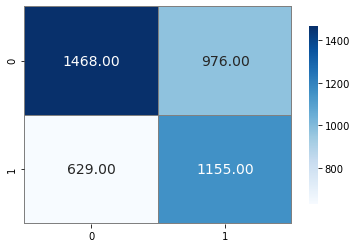

In [49]:
model_5 = KNeighborsClassifier(n_neighbors = 8)
model_5.fit(X_train, y_train)
y_hat = model_5.predict(X_test)
print(confusion_matrix(y_test, y_hat))
matrix = confusion_matrix(y_test, y_hat, labels=y.unique(), normalize=None)
print(classification_report(y_test, y_hat))
sns.heatmap(matrix, annot=True,  
                  annot_kws={"size": 14},
                  fmt='.2f', cmap="Blues", cbar_kws={"shrink": .82},
                  linewidths=0.1, linecolor='gray')

Optimal K:  8


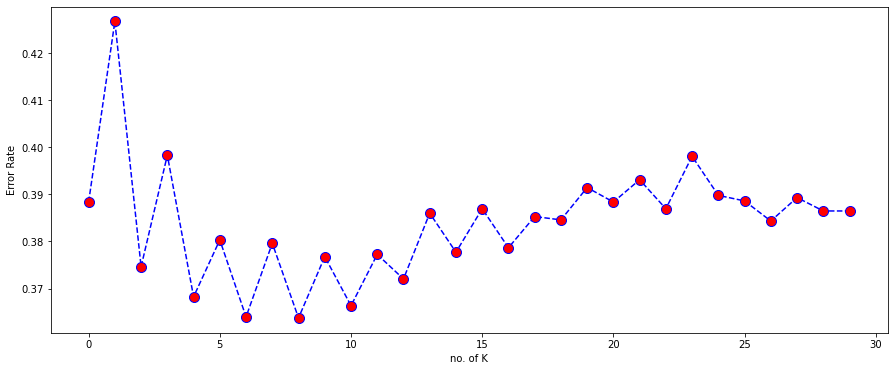

In [50]:
error_rate = []
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    # error_rate.append -> adds error rate of model with various k-value, using the average where prediction not
# equal to the test values
error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(15,6))
plt.plot(error_rate,color='blue',linestyle='dashed',marker='o', markerfacecolor='red', markersize='10')
plt.xlabel('no. of K')
plt.ylabel('Error Rate')
optimal_k = error_rate.index(min(error_rate))
print("Optimal K: ", optimal_k)

Optimal K:  8


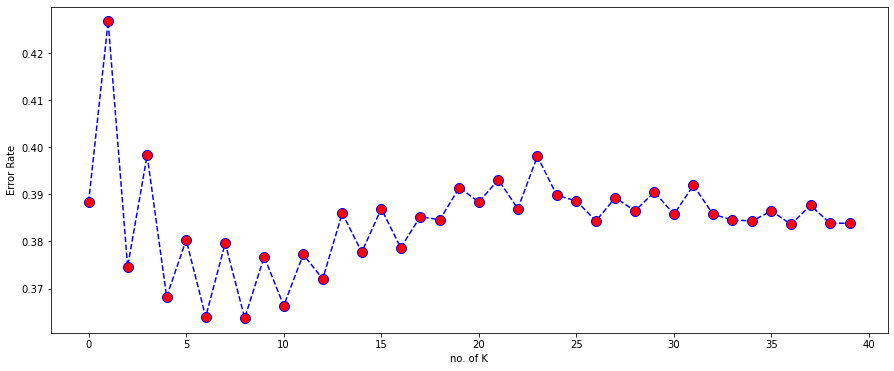

In [51]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    # error_rate.append -> adds error rate of model with various k-value, using the average where prediction not
# equal to the test values
error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(15,6))
plt.plot(error_rate,color='blue',linestyle='dashed',marker='o', markerfacecolor='red', markersize='10')
plt.xlabel('no. of K')
plt.ylabel('Error Rate')
optimal_k = error_rate.index(min(error_rate))
print("Optimal K: ", optimal_k)

[0.597 0.571 0.609 0.599 0.608 0.608 0.606 0.609 0.607 0.605 0.6   0.604
 0.603 0.609 0.601 0.609 0.599 0.605 0.602 0.606 0.598 0.601 0.595 0.601
 0.594 0.598 0.591 0.6   0.596 0.602 0.593 0.6   0.595 0.6   0.594 0.598
 0.594 0.6   0.59  0.597 0.589 0.598 0.588 0.592 0.586 0.593 0.582 0.588
 0.582]


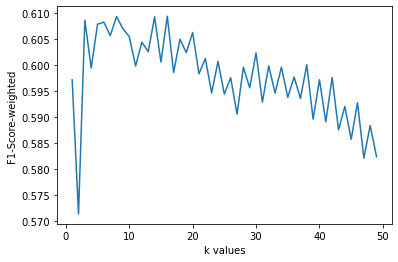

In [52]:
from sklearn import metrics
k_range=list(range(1,50))
k_scores=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores=cross_val_score(knn, X_train, y_train,cv=5, scoring='f1_macro')  # or ‘f1_micro’, ‘f1_weighted’
    k_scores.append(scores.mean())
print(np.round(k_scores,3)) # to display scores to 3 decimal places
                                                                          
plt.plot(k_range,k_scores)
plt.xlabel('k values')
plt.ylabel('F1-Score-weighted')
plt.show()

In [53]:
optimal_k = k_range[k_scores.index(max(k_scores))]
print("Optimal K: ", optimal_k)

Optimal K:  16


[[1686  758]
 [ 770 1014]]
              precision    recall  f1-score   support

           0       0.57      0.57      0.57      1784
           1       0.69      0.69      0.69      2444

    accuracy                           0.64      4228
   macro avg       0.63      0.63      0.63      4228
weighted avg       0.64      0.64      0.64      4228



<AxesSubplot:>

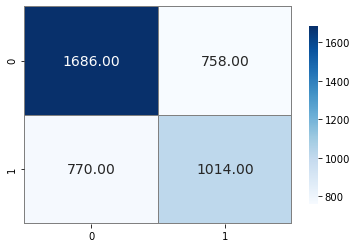

In [54]:
# Training the model on Optimal K.
knn_optimal = KNeighborsClassifier(n_neighbors=5, weights='distance') 
knn_optimal.fit(X_train, y_train)

y_hat = knn_optimal.predict(X_test)
matrix = confusion_matrix(y_test, y_hat, labels=y.unique(), normalize=None)
print(matrix)
print(classification_report(y_test, y_hat))
sns.heatmap(matrix, annot=True,  
                  annot_kws={"size": 14},
                  fmt='.2f', cmap="Blues", cbar_kws={"shrink": .82},
                  linewidths=0.1, linecolor='gray')

[[1155  629]
 [ 976 1468]]
              precision    recall  f1-score   support

           0       0.54      0.65      0.59      1784
           1       0.70      0.60      0.65      2444

    accuracy                           0.62      4228
   macro avg       0.62      0.62      0.62      4228
weighted avg       0.63      0.62      0.62      4228



<AxesSubplot:>

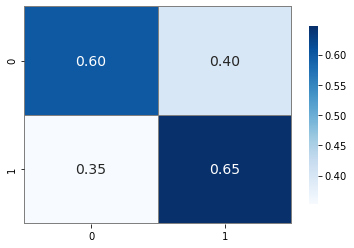

In [55]:
model_5 = KNeighborsClassifier(n_neighbors = 8)
model_5.fit(X_train, y_train)
y_hat = model_5.predict(X_test)
print(confusion_matrix(y_test, y_hat))
matrix = confusion_matrix(y_test, y_hat, labels=y.unique(), normalize="true")
print(classification_report(y_test, y_hat))
sns.heatmap(matrix, annot=True,  
                  annot_kws={"size": 14},
                  fmt='.2f', cmap="Blues", cbar_kws={"shrink": .82},
                  linewidths=0.1, linecolor='gray')

[[6254  623]
 [ 141 5061]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      5202
           1       0.98      0.91      0.94      6877

    accuracy                           0.94     12079
   macro avg       0.93      0.94      0.94     12079
weighted avg       0.94      0.94      0.94     12079



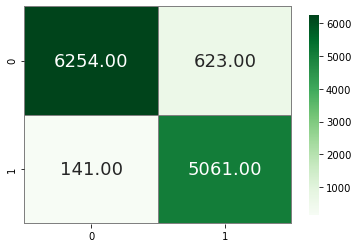

In [56]:
#Here weights= 'distance', K=5 
X2 = dataset_preprocessed[['destination',  'time', 'coupon',  'gender', 'age',  'education', 'occupation','income','direction_same','direction_opp']]
#model_2 = KNeighborsClassifier() 
model_2 = KNeighborsClassifier(n_neighbors=5, weights='distance') 
model_2.fit(X2, y_true)

y_hat = model_2.predict(X2)
labels = dataset_preprocessed["Y"].unique()

matrix2 = confusion_matrix(y_true, y_hat, labels=labels, normalize=None)
print(matrix2)

sns.heatmap(matrix2, annot=True,  
                  annot_kws={"size": 18},
                  fmt='.2f', cmap="Greens", cbar_kws={"shrink": .92},
                  linewidths=0.1, linecolor='gray')
print(classification_report(y_true, y_hat))

In [59]:
 X = dataset_preprocessed[feature_names]

model_1 = KNeighborsClassifier() 
# KNeighborsClassifier(n_neighbors=5, weights='distance') 

## Fit (i.e. traing) the model
model_1.fit(X, y_true)

KNeighborsClassifier()

In [60]:
print(classification_report(y_true, y_hat))
#plot_decision_regions(X.values, y_true.astype(np.int_), model_1)

              precision    recall  f1-score   support

           0       0.75      0.71      0.73      5202
           1       0.79      0.82      0.80      6877

    accuracy                           0.77     12079
   macro avg       0.77      0.76      0.76     12079
weighted avg       0.77      0.77      0.77     12079



In [62]:
X = dataset_preprocessed.drop(['Y'], axis=1)
Xt = X.copy()
y = dataset_preprocessed['Y']
best_k_score =0
best_i = 0
best_split = 0

#Using Splitting
for f in range (-1,10):
    if(f != -1):
        Xt = X.drop([dataset_preprocessed[feature_names][f]], axis=1)
        
    for j in range (1, 90): #split percentage
        X_train, X_test, y_train, y_test = train_test_split(Xt, y, test_size=j*0.01, random_state=42, shuffle=True)
        
        for i in range (1,40): #k-neighbours
            model_2 = KNeighborsClassifier(n_neighbors=i, weights='distance') 
            model_2.fit(X_train, y_train)
            y_pred = model_2.predict(X_test)
            score= model_2.score(X_test, y_test)
            if(score*100 > best_k_score):
                best_k_score = score * 100
                best_i = i
                best_split = j
                X = Xt
            
print("For splitting, the best k score is: %d, the best k-neighbours %d, the best split is: %d, and the best features are: " %(best_k_score, best_i, best_split), X.columns)




KeyboardInterrupt: 

(12079, 24)

In [72]:
X = dataset_preprocessed.drop(['Y'], axis=1)
Xt = X.copy()
y = dataset_preprocessed['Y']
best_k_score =0
best_i = 0
best_split = 0

#Using Splitting
for f in range (-1,24):
    if(f != -1):
        Xt = X.drop([dataset_preprocessed.columns[f]], axis=1)
    for j in range (1, 5): #split percentage
        X_train, X_test, y_train, y_test = train_test_split(Xt, y, test_size=j*0.2, random_state=42, shuffle=True)
        for i in range (1,40): #k-neighbours
            model_2 = KNeighborsClassifier(n_neighbors=i, weights='distance') 
            model_2.fit(X_train, y_train)
            y_pred = model_2.predict(X_test)
            score= model_2.score(X_test, y_test)
            if(score*100 > best_k_score):
                best_k_score = score * 100
                best_i = i
                best_split = j
                X = Xt
            
print("For splitting, the best k score is: %d, the best k-neighbours %d, the best split is: %d, and the best features are: " %(best_k_score, best_i, best_split), X.columns)




For splitting, the best k score is: 71, the best k-neighbours 33, the best split is: 1, and the best features are:  Index(['destination', 'passanger', 'weather', 'coupon', 'expiration',
       'education', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp'],
      dtype='object')


In [ ]:
y = dataset_preprocessed['Y']
best_i = 0
best_split = 0
X = dataset_preprocessed.drop(['Y'], axis=1)
Xt = X.copy()
best_k_score =0
best_k = 0
best_cv = 0
best_split = 0
final_scores = []
cv_scores = []

# Using Cross-Validation
for f in range (-1,24):
    if(f != -1):
        Xt = X.drop([dataset_preprocessed.columns[f]], axis=1)
    for j in range (1, 10): #split percentage
        X_train, X_test, y_train, y_test = train_test_split(Xt, y, test_size=j*0.1, random_state=42, shuffle=True)
        for w in range (2,10): #cross-validation
            neighbors = np.arange(5, 40, 1)
            scores = []
            X_scaled_train = preprocessing.scale(X_train)
            y_scaled_train = preprocessing.scale(y_train)
            X_scaled_test = preprocessing.scale(X_test)
            y_scaled_test = preprocessing.scale(y_test)
            for k in neighbors:   # running for different K values to know which yields the max accuracy. 
                knn6 = KNeighborsRegressor(n_neighbors = k,  weights = 'distance')
                knn6.fit(X_scaled_train, y_scaled_train)
                score = cross_val_score(knn6, X_scaled_train, y_scaled_train,cv=w)
                scores.append(score.mean())
            final_scores.append(max(scores))
        #print("max scores: %d" %(max(final_scores) * 100))
        #print("index of max score: %d" %final_scores.index(max(final_scores)))
        cv_scores.append((max(final_scores),final_scores.index(max(final_scores))))
        if(max(final_scores) * 100 > best_k_score):
            best_k_score = max(final_scores) * 100
            best_k = k
            best_cv = w
            best_split = j*20
            X = Xt

print("For cross-validation, the best k-score is: %d, best k-neighbours is: %d, the best cv is: %d, the best split is: %d, and the best features are:" %(best_k_score, k, best_cv, best_split), X.columns)


In [ ]:
#Experiment that is not good
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
X = dataset_preprocessed.drop(['Y'], axis=1)
Xt = X.copy()
y = dataset_preprocessed['Y']
best_k_score =0
best_i = 0
best_split = 0


X = dataset_preprocessed.drop(['Y'], axis=1)
Xt = X.copy()
best_k_score =0
best_k = 0
best_cv = 0
best_split = 0
final_scores = []
cv_scores = []

# Using Cross-Validation
for f in range (-1,24):
    if(f != -1):
        Xt = X.drop([dataset_preprocessed.columns[f]], axis=1)
    for j in range (1, 3): #split percentage
        X_train, X_test, y_train, y_test = train_test_split(Xt, y, test_size=j*0.1, random_state=42, shuffle=True)
        #neighbors = np.arange(5, 20, 1)
        X_scaled_train = preprocessing.scale(X_train)
        y_scaled_train = preprocessing.scale(y_train)
        X_scaled_test = preprocessing.scale(X_test)
        y_scaled_test = preprocessing.scale(y_test)
        #for k in neighbors:
        knn6 = KNeighborsRegressor(n_neighbors = 19,  weights = 'distance')
        knn6.fit(X_scaled_train, y_scaled_train)
        score = cross_val_score(knn6, X_scaled_train, y_scaled_train,cv=5)
        if(score * 100 > best_k_score):
            best_k_score = scores * 100
            best_split = j*10
            X = Xt

print("For cross-validation, the best k-score is: %d, best k-neighbours is: %d, the best cv is: %d, the best split is: %d, and the best features are:" %(best_k_score, k, best_cv, best_split), X.columns)


In [ ]:
X = dataset_preprocessed.drop(['Y'], axis=1)
Xt = X.copy()
y = dataset_preprocessed['Y']
best_k_score =0

# Using Cross-Validation
for f in range (-1,24):
    if(f != -1):
        Xt = X.drop([dataset_preprocessed.columns[f]], axis=1)
    X_train, X_test, y_train, y_test = train_test_split(Xt, y, test_size=0.2, random_state=42, shuffle=True)
    knn6 = KNeighborsClassifier(n_neighbors = 33,  weights = 'distance')
    knn6.fit(X_train, y_train)
    score = cross_val_score(knn6, X_train, y_train,cv=5)
    if(score.mean() * 100 > best_k_score):
        best_k_score = score.mean() * 100
        X = Xt

print("For cross-validation, the best k-score is: %d, and the best features are:" %(best_k_score), X.columns)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

y = dataset_preprocessed['Y']
X = dataset_preprocessed.drop(['Y'], axis=1)

clf=RandomForestClassifier(n_estimators=400)
X_train, X_test, y_train, y_test = train_test_split(Xt, y, test_size=0.1, random_state=42, shuffle=True)
clf.fit(X_train,y_train)
y_pred = cross_val_score(clf, X_train, y_train,cv=5)
print("Accuracy: ", y_pred.mean()*100, "%")